In [78]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(image_path):
    try:
        image = Image.open(image_path)

        image = np.array(image)
        # if len(image.shape) == 3 and image.shape[2] == 4:
            # image = cv2.cvtColor(image, cv2.COlOR_RGB2BGR)
            #swap RGB to BGR while preserviing alpha channel.
            # image = image[:,:,[2,1,0,3]]
        return image
    except Exception as e:
        print("error loading image " + image_path)
        raise e

def load_and_pad_image(image_path, target_width, target_height):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

    # If the image does not have an alpha channel, add one
    # if image.shape[2] == 3:
    #     image = cv2.cvtColor(image, cv2.COLOR_BGR2BGRA)

    # Calculate padding
    height, width = image.shape[:2]
    pad_top = (target_height - height) // 2
    pad_bottom = target_height - height - pad_top
    pad_left = (target_width - width) // 2
    pad_right = target_width - width - pad_left

    # Pad the image with transparent pixels
    padded_image = cv2.copyMakeBorder(
        image, pad_top, pad_bottom, pad_left, pad_right, 
        cv2.BORDER_CONSTANT, value=[0, 0, 0, 0]
    )

    return padded_image
    
def overlay_image(source, overlay, bbox):

    #linear blend 

    # create mask
    x,y,w,h = bbox
    resized_overlay = cv2.resize(overlay, (w, h))
    
    # Create a mask from the alpha channel if the hat image has 4 channels (RGBA)
    if overlay.shape[2] == 4:
        mask =  resized_overlay[:, :, 3] / 255.0
        mask = np.expand_dims(mask, axis=2)
    else:
        mask = np.ones((h, w, 1))
    
    print("resized_overlay shape: " )
    print(resized_overlay.shape)
    print("mask shape: " )
    print(mask.shape)

    # Extract the region of interest (ROI) from the base image
    roi = source[y:y+h, x:x+w]
    print("roi shape: " )
    print(roi.shape)
    
    # Ensure ROI and    resized_overlay have the same shape
    # if roi.shape[:2] != resized_overlay.shape[:2]:
    #     return source
    

    # # [blend_images]
    # alpha = 0.9
    # beta = (1.0 - alpha)
    # dst = cv2.addWeighted(source, beta, overlay, alpha, 0.0)
    # Blend the images using the mask
    
    blended = roi * (1 - mask) + resized_overlay * mask

    result = source.copy()
    result[y:y+h, x:x+w] = blended
    
    return result
    # return dst

def display_image(image):
    plt.figure(figsize=(10,8))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def calc_dim_resize(image, target_height,target_width):
    resized_image = cv2.resize(image, (target_height,target_width))
    return resized_image

source shape: 
(499, 504, 4)
overlay shape: 
(499, 504, 4)
resized_overlay shape: 
(62, 310, 4)
mask shape: 
(62, 310, 1)
roi shape: 
(62, 310, 4)


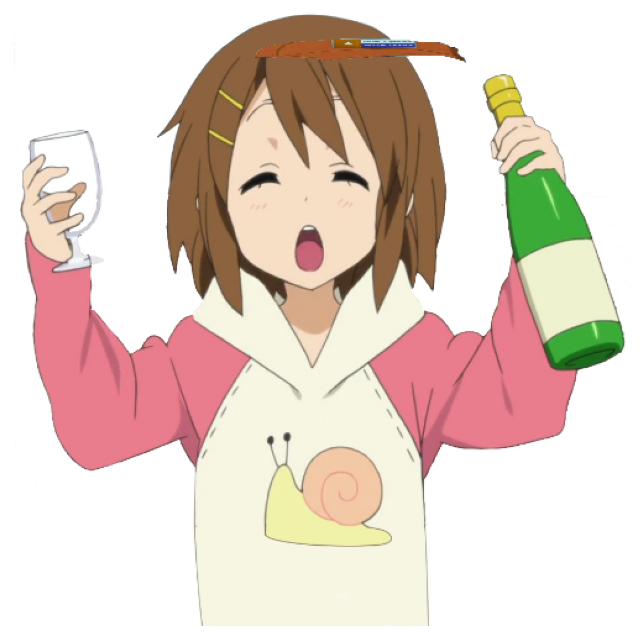

In [79]:
image_path = 'images/source_pic.png'
overlay_path = 'images/texas-cap-transparent.png'

source = load_image(image_path)
overlay = load_and_pad_image(overlay_path, source.shape[1], source.shape[0])

print("source shape: " )
print(source.shape)
print("overlay shape: " )
print(overlay.shape)

y_start , y_end = 2, 62
x_start , x_end = 128, 310
# y_start , y_end = 14, 95
# x_start , x_end = 195, 418

result = overlay_image(source, overlay,(x_start, y_start , x_end, y_end) )

display_image(result)